# Importing All the Necessary Libraries

In [1]:
!pip install pystan==2.19.1.1 prophet
!pip install prophet

  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\navee\anaconda3\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\navee\\AppData\\Local\\Temp\\pip-install-elya9l3u\\pystan_383fc291624547a39a9c4e340927a00e\\setup.py'"'"'; __file__='"'"'C:\\Users\\navee\\AppData\\Local\\Temp\\pip-install-elya9l3u\\pystan_383fc291624547a39a9c4e340927a00e\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\navee\AppData\Local\Temp\pip-wheel-n_hn08l5'
       cwd: C:\Users\navee\AppData\Local\Temp\pip-install-elya9l3u\pystan_383fc291624547a39a9c4e340927a00e\
  Complete output (17845 lines):
  Compiling pystan/_api.pyx because it depends on C:\Users\navee\anaconda3\lib\site-packages\Cython\Includes\libcp

  Using cached pystan-2.19.1.1.tar.gz (16.2 MB)
  Using cached prophet-1.1.5-py3-none-win_amd64.whl (13.3 MB)
  Using cached holidays-0.42-py3-none-any.whl (917 kB)
  Using cached cmdstanpy-1.2.1-py3-none-any.whl (93 kB)
  Using cached importlib_resources-6.1.1-py3-none-any.whl (33 kB)
  Using cached numpy-1.26.4-cp39-cp39-win_amd64.whl (15.8 MB)
  Using cached stanio-0.3.0-py3-none-any.whl (6.2 kB)
  Running setup.py clean for pystan
Failed to build pystan
  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.3
    Uninstalling numpy-1.20.3:
      Successfully uninstalled numpy-1.20.3
    Running setup.py install for pystan: started
    Running setup.py install for pystan: finished with status 'error'


  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\archive\iterators\base64_from_binary.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\archive\iterators
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\archive\iterators\binary_from_base64.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\archive\iterators
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\archive\iterators\dataflow.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\archive\iterators
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\archive\iterators\dataflow_exception.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\archive\iterators
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\archive\iterators\escape.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\archive\iterators
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0

  Using cached prophet-1.1.5-py3-none-win_amd64.whl (13.3 MB)

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet

# Reading The Data sets

In [3]:
Data1 = pd.read_csv(r"C:\Users\navee\Machine learning Projects\Crime Rate Forecasting\Chicago_Crimes_2005_to_2007.csv\Chicago_Crimes_2005_to_2007.csv",error_bad_lines=False)
Data2 = pd.read_csv(r"C:\Users\navee\Machine learning Projects\Crime Rate Forecasting\Chicago_Crimes_2008_to_2011.csv\Chicago_Crimes_2008_to_2011.csv",error_bad_lines=False)
Data3 = pd.read_csv(r"C:\Users\navee\Machine learning Projects\Crime Rate Forecasting\Chicago_Crimes_2012_to_2017.csv\Chicago_Crimes_2012_to_2017.csv",error_bad_lines=False)

C:\Users\navee\AppData\Local\Temp/ipykernel_19820/3208860964.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  Data1 = pd.read_csv(r"C:\Users\navee\Machine learning Projects\Crime Rate Forecasting\Chicago_Crimes_2005_to_2007.csv\Chicago_Crimes_2005_to_2007.csv",error_bad_lines=False)
b'Skipping line 533719: expected 23 fields, saw 24\n'
C:\Users\navee\AppData\Local\Temp/ipykernel_19820/3208860964.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  Data2 = pd.read_csv(r"C:\Users\navee\Machine learning Projects\Crime Rate Forecasting\Chicago_Crimes_2008_to_2011.csv\Chicago_Crimes_2008_to_2011.csv",error_bad_lines=False)
b'Skipping line 1149094: expected 23 fields, saw 41\n'
C:\Users\navee\AppData\Local\Temp/ipykernel_19820/3208860964.py:3: FutureWarning: The error_bad_lines argument has been depreca

Content
ID - Unique identifier for the record.

Case Number - The Chicago Police Department RD Number (Records Division Number), which is unique to the incident.

Date - Date when the incident occurred. this is sometimes a best estimate.

Block - The partially redacted address where the incident occurred, placing it on the same block as the actual address.

IUCR - The Illinois Unifrom Crime Reporting code. This is directly linked to the Primary Type and Description. See the list of IUCR codes at https://data.cityofchicago.org/d/c7ck-438e.

Primary Type - The primary description of the IUCR code.

Description - The secondary description of the IUCR code, a subcategory of the primary description.

Location Description - Description of the location where the incident occurred.

Arrest - Indicates whether an arrest was made.

Domestic - Indicates whether the incident was domestic-related as defined by the Illinois Domestic Violence Act.

Beat - Indicates the beat where the incident occurred. A beat is the smallest police geographic area – each beat has a dedicated police beat car. Three to five beats make up a police sector, and three sectors make up a police district. The Chicago Police Department has 22 police districts. See the beats at https://data.cityofchicago.org/d/aerh-rz74.

District - Indicates the police district where the incident occurred. See the districts at https://data.cityofchicago.org/d/fthy-xz3r.

Ward - The ward (City Council district) where the incident occurred. See the wards at https://data.cityofchicago.org/d/sp34-6z76.

Community Area - Indicates the community area where the incident occurred. Chicago has 77 community areas. See the community areas at https://data.cityofchicago.org/d/cauq-8yn6.

FBI Code - Indicates the crime classification as outlined in the FBI's National Incident-Based Reporting System (NIBRS). See the Chicago Police Department listing of these classifications at http://gis.chicagopolice.org/clearmap_crime_sums/crime_types.html.

X Coordinate - The x coordinate of the location where the incident occurred in State Plane Illinois East NAD 1983 projection. This location is shifted from the actual location for partial redaction but falls on the same block.

Y Coordinate - The y coordinate of the location where the incident occurred in State Plane Illinois East NAD 1983 projection. This location is shifted from the actual location for partial redaction but falls on the same block.

Year - Year the incident occurred.

Updated On - Date and time the record was last updated.

Latitude - The latitude of the location where the incident occurred. This location is shifted from the actual location for partial redaction but falls on the same block.

Longitude - The longitude of the location where the incident occurred. This location is shifted from the actual location for partial redaction but falls on the same block.

Location - The location where the incident occurred in a format that allows for creation of maps and other geographic operations on this data portal. This location is shifted from the actual location for partial redaction but falls on the same block.

In [4]:
Data = pd.concat([Data1,Data2,Data3])

In [5]:
Data.head()

Unnamed: 0       ID Case Number                    Date  \
0           0  4673626    HM274058  04/02/2006 01:00:00 PM   
1           1  4673627    HM202199  02/26/2006 01:40:48 PM   
2           2  4673628    HM113861  01/08/2006 11:16:00 PM   
3           4  4673629    HM274049  04/05/2006 06:45:00 PM   
4           5  4673630    HM187120  02/17/2006 09:03:14 PM   

                 Block  IUCR   Primary Type                   Description  \
0    055XX N MANGO AVE  2825  OTHER OFFENSE       HARASSMENT BY TELEPHONE   
1   065XX S RHODES AVE  2017      NARCOTICS            MANU/DELIVER:CRACK   
2      013XX E 69TH ST  051A        ASSAULT           AGGRAVATED: HANDGUN   
3  061XX W NEWPORT AVE  0460        BATTERY                        SIMPLE   
4      037XX W 60TH ST  1811      NARCOTICS  POSS: CANNABIS 30GMS OR LESS   

  Location Description  Arrest  ...  Ward  Community Area  FBI Code  \
0            RESIDENCE   False  ...  45.0            11.0        26   
1             SIDEWALK    True  ...  20.0            42.0        18   
2                OTHER   False  ...   5.0            69.0       04A   
3            RESIDENCE   False  ...  38.0            17.0       08B   
4                ALLEY    True  ...  13.0            65.0        18   

   X Coordinate  Y Coordinate  Year              Updated On   Latitude  \
0     1136872.0     1936499.0  2006  04/15/2016 08:55:02 AM  41.981913   
1     1181027.0     1861693.0  2006  04/15/2016 08:55:02 AM  41.775733   
2     1186023.0     1859609.0  2006  04/15/2016 08:55:02 AM  41.769897   
3     1134772.0     1922299.0  2006  04/15/2016 08:55:02 AM  41.942984   
4     1152412.0     1864560.0  2006  04/15/2016 08:55:02 AM  41.784211   

   Longitude                       Location  
0 -87.771996  (41.981912692, -87.771996382)  
1 -87.611920  (41.775732538, -87.611919814)  
2 -87.593671  (41.769897392, -87.593670899)  
3 -87.780057  (41.942984005, -87.780056951)  
4 -87.716745   (41.784210853, -87.71674491)  

[5 rows x 23 columns]

In [6]:
Data.tail()

Unnamed: 0        ID Case Number                    Date  \
1456709     6250330  10508679    HZ250507  05/03/2016 11:33:00 PM   
1456710     6251089  10508680    HZ250491  05/03/2016 11:30:00 PM   
1456711     6251349  10508681    HZ250479  05/03/2016 12:15:00 AM   
1456712     6253257  10508690    HZ250370  05/03/2016 09:07:00 PM   
1456713     6253474  10508692    HZ250517  05/03/2016 11:38:00 PM   

                        Block  IUCR     Primary Type              Description  \
1456709       026XX W 23RD PL  0486          BATTERY  DOMESTIC BATTERY SIMPLE   
1456710   073XX S HARVARD AVE  1310  CRIMINAL DAMAGE              TO PROPERTY   
1456711       024XX W 63RD ST  041A          BATTERY      AGGRAVATED: HANDGUN   
1456712  082XX S EXCHANGE AVE  0486          BATTERY  DOMESTIC BATTERY SIMPLE   
1456713       001XX E 75TH ST  5007    OTHER OFFENSE  OTHER WEAPONS VIOLATION   

                   Location Description  Arrest  ...  Ward  Community Area  \
1456709                       APARTMENT    True  ...  28.0            30.0   
1456710                       APARTMENT    True  ...  17.0            69.0   
1456711                        SIDEWALK   False  ...  15.0            66.0   
1456712                        SIDEWALK   False  ...   7.0            46.0   
1456713  PARKING LOT/GARAGE(NON.RESID.)    True  ...   6.0            69.0   

         FBI Code  X Coordinate  Y Coordinate  Year              Updated On  \
1456709       08B     1159105.0     1888300.0  2016  05/10/2016 03:56:50 PM   
1456710        14     1175230.0     1856183.0  2016  05/10/2016 03:56:50 PM   
1456711       04B     1161027.0     1862810.0  2016  05/10/2016 03:56:50 PM   
1456712       08B     1197261.0     1850727.0  2016  05/10/2016 03:56:50 PM   
1456713        26     1178696.0     1855324.0  2016  05/10/2016 03:56:50 PM   

          Latitude  Longitude                       Location  
1456709  41.849222 -87.691556   (41.849222028, -87.69155551)  
1456710  41.760744 -87.633335   (41.760743949, -87.63333531)  
1456711  41.779235 -87.685207  (41.779234743, -87.685207125)  
1456712  41.745252 -87.552773  (41.745251975, -87.552773464)  
1456713  41.758309 -87.620658   (41.75830866, -87.620658418)  

[5 rows x 23 columns]

In [7]:
Data.shape

(6017767, 23)

In [8]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6017767 entries, 0 to 1456713
Data columns (total 23 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Unnamed: 0            int64  
 1   ID                    int64  
 2   Case Number           object 
 3   Date                  object 
 4   Block                 object 
 5   IUCR                  object 
 6   Primary Type          object 
 7   Description           object 
 8   Location Description  object 
 9   Arrest                bool   
 10  Domestic              bool   
 11  Beat                  int64  
 12  District              float64
 13  Ward                  float64
 14  Community Area        float64
 15  FBI Code              object 
 16  X Coordinate          float64
 17  Y Coordinate          float64
 18  Year                  int64  
 19  Updated On            object 
 20  Latitude              float64
 21  Longitude             float64
 22  Location              object 
dtypes: bool

# Checking the Null values in a data set

In [9]:
Data.isnull().any()

Unnamed: 0              False
ID                      False
Case Number              True
Date                    False
Block                   False
IUCR                    False
Primary Type            False
Description             False
Location Description     True
Arrest                  False
Domestic                False
Beat                    False
District                 True
Ward                     True
Community Area           True
FBI Code                False
X Coordinate             True
Y Coordinate             True
Year                    False
Updated On              False
Latitude                 True
Longitude                True
Location                 True
dtype: bool

In [10]:
Data.isnull().sum()

Unnamed: 0                  0
ID                          0
Case Number                 7
Date                        0
Block                       0
IUCR                        0
Primary Type                0
Description                 0
Location Description     1974
Arrest                      0
Domestic                    0
Beat                        0
District                   89
Ward                       92
Community Area           1844
FBI Code                    0
X Coordinate            74882
Y Coordinate            74882
Year                        0
Updated On                  0
Latitude                74882
Longitude               74882
Location                74882
dtype: int64

# Selecting Necessary Columns

In [11]:
Data.columns

Index(['Unnamed: 0', 'ID', 'Case Number', 'Date', 'Block', 'IUCR',
       'Primary Type', 'Description', 'Location Description', 'Arrest',
       'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code',
       'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')

In [12]:
Final_data = Data[['ID','Date','Primary Type','Location Description','Arrest','Domestic']]

In [13]:
Final_data.head()

ID                    Date   Primary Type Location Description  \
0  4673626  04/02/2006 01:00:00 PM  OTHER OFFENSE            RESIDENCE   
1  4673627  02/26/2006 01:40:48 PM      NARCOTICS             SIDEWALK   
2  4673628  01/08/2006 11:16:00 PM        ASSAULT                OTHER   
3  4673629  04/05/2006 06:45:00 PM        BATTERY            RESIDENCE   
4  4673630  02/17/2006 09:03:14 PM      NARCOTICS                ALLEY   

   Arrest  Domestic  
0   False     False  
1    True     False  
2   False     False  
3   False     False  
4    True     False

In [14]:
Final_data.isnull().sum()

ID                         0
Date                       0
Primary Type               0
Location Description    1974
Arrest                     0
Domestic                   0
dtype: int64

In [15]:
Data_final = Final_data.dropna()

In [16]:
Data_final.isnull().sum()

ID                      0
Date                    0
Primary Type            0
Location Description    0
Arrest                  0
Domestic                0
dtype: int64

In [17]:
Data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6015793 entries, 0 to 1456713
Data columns (total 6 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   ID                    int64 
 1   Date                  object
 2   Primary Type          object
 3   Location Description  object
 4   Arrest                bool  
 5   Domestic              bool  
dtypes: bool(2), int64(1), object(3)
memory usage: 241.0+ MB


In [18]:
Data_final.Date = pd.to_datetime(Data_final.Date,format= '%m/%d/%Y %I:%M:%S %p')

C:\Users\navee\AppData\Local\Temp/ipykernel_19820/729789011.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data_final.Date = pd.to_datetime(Data_final.Date,format= '%m/%d/%Y %I:%M:%S %p')


In [19]:
Data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6015793 entries, 0 to 1456713
Data columns (total 6 columns):
 #   Column                Dtype         
---  ------                -----         
 0   ID                    int64         
 1   Date                  datetime64[ns]
 2   Primary Type          object        
 3   Location Description  object        
 4   Arrest                bool          
 5   Domestic              bool          
dtypes: bool(2), datetime64[ns](1), int64(1), object(2)
memory usage: 241.0+ MB


# Finding the top 10 Prime Crime Types

In [20]:
Data_final['Primary Type'].value_counts().head(10)

THEFT                  1244395
BATTERY                1079174
CRIMINAL DAMAGE         702696
NARCOTICS               674829
BURGLARY                369053
OTHER OFFENSE           368168
ASSAULT                 360242
MOTOR VEHICLE THEFT     271624
ROBBERY                 229463
DECEPTIVE PRACTICE      223947
Name: Primary Type, dtype: int64

# Finding the top 10 Crime Location Descriptions

In [21]:
Data_final['Location Description'].value_counts().head(10)

STREET                            1517724
RESIDENCE                          991977
SIDEWALK                           674793
APARTMENT                          668298
OTHER                              216154
PARKING LOT/GARAGE(NON.RESID.)     166331
ALLEY                              137094
SCHOOL, PUBLIC, BUILDING           128852
RESIDENCE-GARAGE                   119619
VEHICLE NON-COMMERCIAL             107554
Name: Location Description, dtype: int64

# Checking Howmany are Arrested having location Street

In [25]:
Data_final[Data_final['Location Description']=='STREET']['Arrest'].value_counts()

False    1093718
True      424006
Name: Arrest, dtype: int64

In [26]:
Data_final.index = pd.DatetimeIndex(Data_final.Date)

In [27]:
Data_final.head()

ID                Date   Primary Type  \
Date                                                              
2006-04-02 13:00:00  4673626 2006-04-02 13:00:00  OTHER OFFENSE   
2006-02-26 13:40:48  4673627 2006-02-26 13:40:48      NARCOTICS   
2006-01-08 23:16:00  4673628 2006-01-08 23:16:00        ASSAULT   
2006-04-05 18:45:00  4673629 2006-04-05 18:45:00        BATTERY   
2006-02-17 21:03:14  4673630 2006-02-17 21:03:14      NARCOTICS   

                    Location Description  Arrest  Domestic  
Date                                                        
2006-04-02 13:00:00            RESIDENCE   False     False  
2006-02-26 13:40:48             SIDEWALK    True     False  
2006-01-08 23:16:00                OTHER   False     False  
2006-04-05 18:45:00            RESIDENCE   False     False  
2006-02-17 21:03:14                ALLEY    True     False

In [34]:
# Yearly Crime Distribution
Data_final.resample('Y').size()

Date
2005-12-31    455805
2006-12-31    794670
2007-12-31    621843
2008-12-31    852044
2009-12-31    783888
2010-12-31    700676
2011-12-31    351811
2012-12-31    335328
2013-12-31    306637
2014-12-31    274345
2015-12-31    262738
2016-12-31    264679
2017-12-31     11329
Freq: A-DEC, dtype: int64

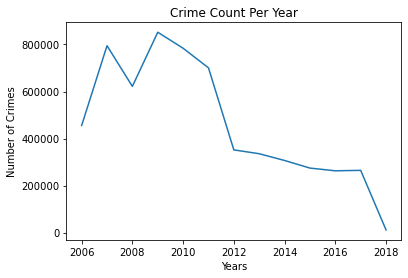

In [35]:
plt.plot(Data_final.resample('Y').size())
plt.title('Crime Count Per Year')
plt.xlabel('Years')
plt.ylabel('Number of Crimes')
plt.show()

In [36]:
# Monthly Crime Distribution 
Data_final.resample('M').size()

Date
2005-01-31    33983
2005-02-28    32042
2005-03-31    36968
2005-04-30    38963
2005-05-31    40570
              ...  
2016-09-30    23176
2016-10-31    23243
2016-11-30    21077
2016-12-31    19517
2017-01-31    11329
Freq: M, Length: 145, dtype: int64

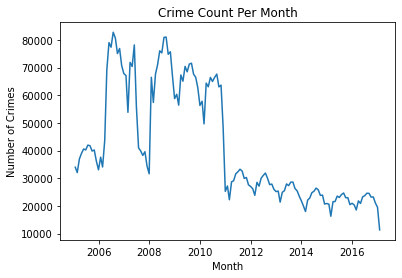

In [37]:
plt.plot(Data_final.resample('M').size())
plt.title('Crime Count Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.show()

# Preparing te Data

In [40]:
Data_prophet = pd.DataFrame(Data_final.resample('M').size().reset_index())

In [41]:
Data_prophet

Date      0
0   2005-01-31  33983
1   2005-02-28  32042
2   2005-03-31  36968
3   2005-04-30  38963
4   2005-05-31  40570
..         ...    ...
140 2016-09-30  23176
141 2016-10-31  23243
142 2016-11-30  21077
143 2016-12-31  19517
144 2017-01-31  11329

[145 rows x 2 columns]

In [42]:
Data_prophet.columns = ['Date','Crime Count']

In [43]:
Data_prophet

Date  Crime Count
0   2005-01-31        33983
1   2005-02-28        32042
2   2005-03-31        36968
3   2005-04-30        38963
4   2005-05-31        40570
..         ...          ...
140 2016-09-30        23176
141 2016-10-31        23243
142 2016-11-30        21077
143 2016-12-31        19517
144 2017-01-31        11329

[145 rows x 2 columns]

# Renaming the Columns

In [45]:
Data_prophet =Data_prophet.rename(columns={'Date':'ds','Crime Count':'y'})

In [46]:
Data_prophet

ds      y
0   2005-01-31  33983
1   2005-02-28  32042
2   2005-03-31  36968
3   2005-04-30  38963
4   2005-05-31  40570
..         ...    ...
140 2016-09-30  23176
141 2016-10-31  23243
142 2016-11-30  21077
143 2016-12-31  19517
144 2017-01-31  11329

[145 rows x 2 columns]

# Training the Model 

In [47]:
m = Prophet()
m.fit(Data_prophet)

22:21:10 - cmdstanpy - INFO - Chain [1] start processing
22:21:11 - cmdstanpy - INFO - Chain [1] done processing


# Making the Predictions

In [50]:
pred = m.make_future_dataframe(periods=24,freq='M')
forcast = m.predict(pred)

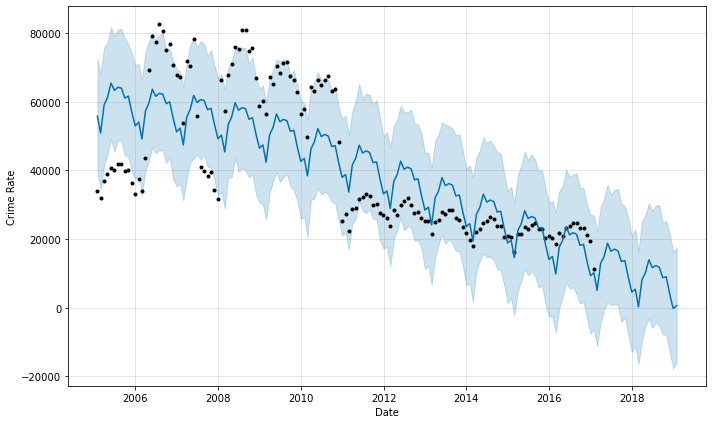

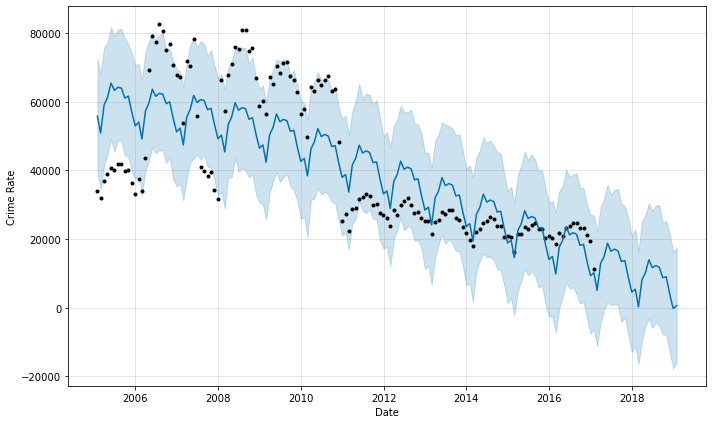

In [52]:
m.plot(forcast,xlabel='Date',ylabel='Crime Rate')

# Saving the Model 

In [53]:
import json
from prophet.serialize import model_to_json, model_from_json

with open('prophet_model.json','w') as fout:
    json.dump(model_to_json(m),fout)

with open('prophet_model.json','r') as fin:
    model = model_from_json(json.load(fin))




c:\Users\navee\anaconda3\lib\site-packages\prophet\serialize.py:172: FutureWarning: The behavior of Timestamp.utcfromtimestamp is deprecated, in a future version will return a timezone-aware Timestamp with UTC timezone. To keep the old behavior, use Timestamp.utcfromtimestamp(ts).tz_localize(None). To get the future behavior, use Timestamp.fromtimestamp(ts, 'UTC')
  setattr(model, attribute, pd.Timestamp.utcfromtimestamp(model_dict[attribute]).tz_localize(None))


In [54]:
x = int(input('Enter Number of Months to Forecast'))


In [55]:
pred = model.make_future_dataframe(periods=x,freq='M')
forcast = model.predict(pred)

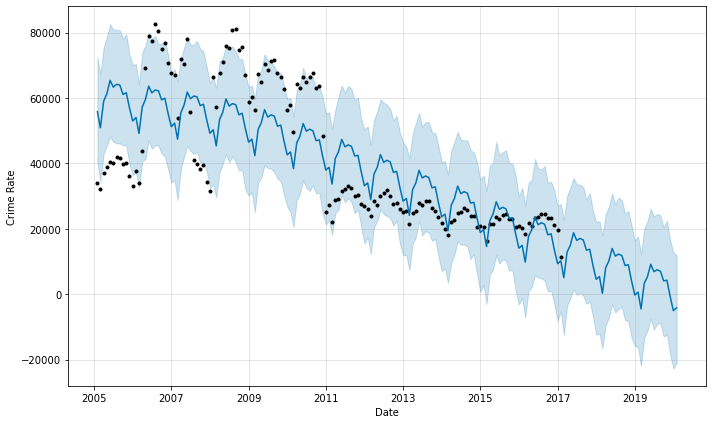

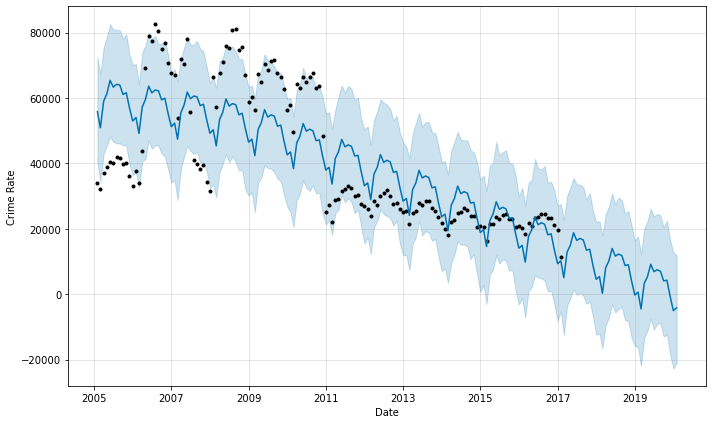

In [56]:
model.plot(forcast,xlabel='Date',ylabel='Crime Rate')